In [232]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import shutil
import matplotlib.colors as mcolors
import numpy as np

def main(df, name_mapping, plot_dir):
    

    colors = list(mcolors.TABLEAU_COLORS.values())[:3]
    grouped_df = df.groupby(['dataset_name', 'user_input_size']).mean().reset_index()
    runtime_columns_without_snorkel = ['snorkel_run_after_fix', 'solver_runtime', 'repair_time']
    os.makedirs(plot_dir, exist_ok=True)

    # Loop through each dataset and create a plot with updated colors
    for idx, dataset_name in enumerate(list(name_mapping)):
        
        dataset_df = grouped_df[grouped_df['dataset_name'] == dataset_name]

        plt.figure(figsize=(3,4))

        # Set the x-axis labels for user input size
        x_labels = dataset_df['user_input_size'].astype(str)

        # Set the positions and width for the bars
        x_pos = np.arange(len(x_labels))
        bar_width = 0.25

        # Plot each runtime metric as a grouped bar plot for the current dataset, using new color palette
        for i, (column, color) in enumerate(zip(runtime_columns_without_snorkel, colors)):
            plt.bar(x_pos + i * bar_width, dataset_df[column], width=bar_width, label=column, color=color)

        # Add labels and title for the current dataset
        plt.ylabel('Runtime')
        plt.yscale('log')  # Set the y-axis to log scale
        plt.xticks(x_pos + bar_width, x_labels, rotation=45)
        plt.title(f'{name_mapping[dataset_name]}', fontsize=14)
        plt.xlabel('Training Set Size', fontsize=15)        
#         plt.legend()
        plt.tight_layout()

        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.tight_layout(pad=1) 
#         # Save the plot as a PNG file
        plt.savefig(f'{plot_dir}/runtime_plot_{dataset_name}.png')
        plt.show()
        plt.close()
    
    updated_runtime_columns = {
        'snorkel_run_after_fix': 'snorkel run after refinement',
        'solver_runtime': 'MILP',
        'repair_time': 'refinement time'
    }

    # Create a figure for the legend with larger text and updated labels
    plt.figure(figsize=(8, 2))

    # Plot dummy bars to create the legend with updated labels and larger font size
    for i, (column, color) in enumerate(zip(runtime_columns_without_snorkel, colors)):
        plt.bar(0, 0, color=color, label=updated_runtime_columns[column])

    # Add the legend outside the plot area horizontally with larger text size
    plt.legend(loc='center', ncol=len(runtime_columns_without_snorkel), frameon=False, fontsize=14)

    # Hide axes for this legend-only figure
    plt.axis('off')

    # Display the legend
    plt.tight_layout()
    plt.savefig(f'{plot_dir}/legend_runtime.png')
    plt.show()
        
    shutil.make_archive(plot_dir, 'zip', plot_dir)


#     # Zip the directory



In [233]:
import ast

In [234]:
df = pd.read_csv('../df_solver_final_version.csv')

In [235]:
df.drop('repair_time', axis=1, inplace=True)

In [236]:
df['runtimes'] = df['runtimes'].apply(ast.literal_eval)


In [237]:
df['dataset_name'].unique()

array(['agnews', 'amazon', 'fakenews', 'imdb', 'painter_architect',
       'physician_professor', 'plots', 'professor_teacher', 'spam',
       'tweets', 'yelp'], dtype=object)

In [238]:
dataset_naming_mappings = {
'amazon': 'Amazon',
'agnews': 'AGNews' ,
'physician_professor': 'PP' ,
'imdb': 'IMDB' ,
'fakenews': 'FNews' ,
'yelp': 'Yelp',
'professor_teacher': 'PT',
'painter_architect': 'PA',
'tweets': 'Tweets',
'spam': 'SMS',
'plots': 'MGenre',
}

In [239]:
df_expanded = pd.json_normalize(df['runtimes'])

# Join the expanded columns back to the original DataFrame (excluding the original dictionary column)
df = df.drop(columns=['runtimes']).join(df_expanded)

# print(df)

In [240]:
df.head()

,dataset_name,before_fix_global_accuracy,new_global_accuracy,user_input_size,min_non_abstain_thresh,random_state,confirm_prev_rate,complain_fix_rate,global_accuracy_on_valid_data,new_global_accuracy_on_valid,...,avg_tree_depth,tree_cnt_after_fix,avg_tree_size,runtime_total,lf_acc_thresh,instance_acc_thresh,snorkel_first_run,snorkel_run_after_fix,solver_runtime,repair_time
0,agnews,0.5437,0.725517,20,0.8,1,1.0,1.0,0.809961,0.725517,...,6.555556,9,13.444444,59.342290,0.7,0.8,16.492345,41.202214,0.579745,1.067986
1,agnews,0.5437,0.596433,20,0.8,2,1.0,1.0,0.809961,0.596433,...,6.555556,9,14.111111,66.911619,0.7,0.8,16.870026,48.166199,0.579469,1.295925
2,agnews,0.5437,0.521767,20,0.8,3,1.0,1.0,0.809961,0.521767,...,6.111111,9,12.777778,50.912623,0.7,0.8,16.856470,32.407740,0.719603,0.928810
3,agnews,0.5437,0.642133,20,0.8,4,0.9,1.0,0.809961,0.642133,...,4.888889,9,9.000000,47.819475,0.7,0.8,16.934868,29.370431,0.632848,0.881328
4,agnews,0.5437,0.598583,20,0.8,5,1.0,0.8,0.809961,0.598583,...,6.222222,9,12.333333,67.283564,0.7,0.8,17.005546,47.671646,0.856353,1.750019


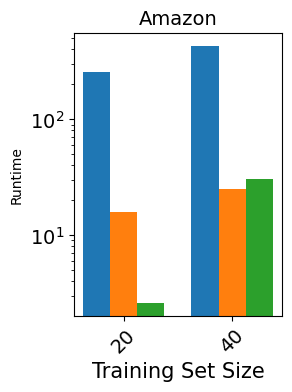

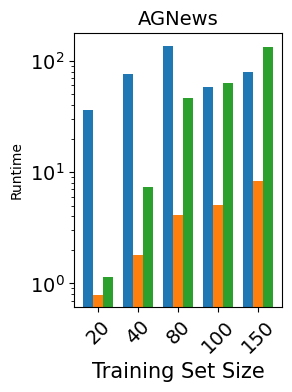

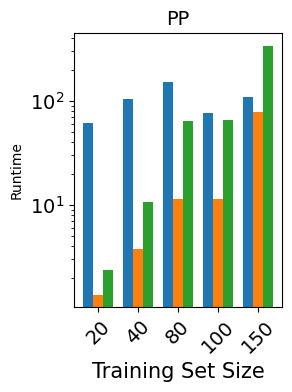

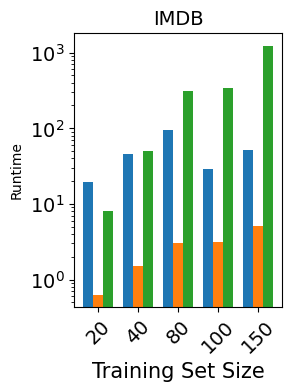

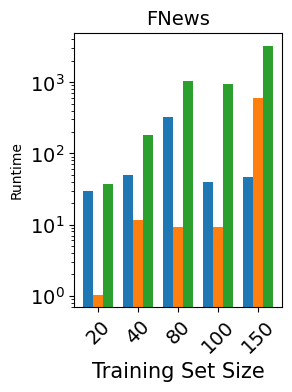

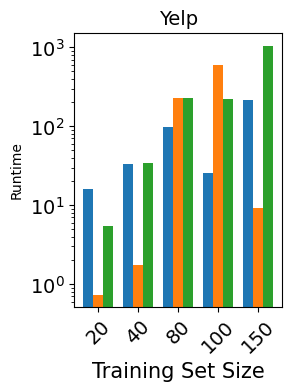

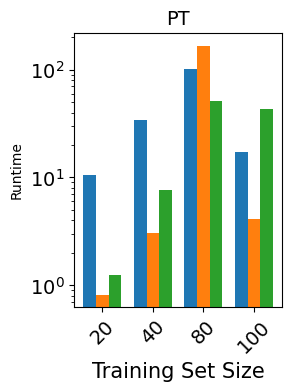

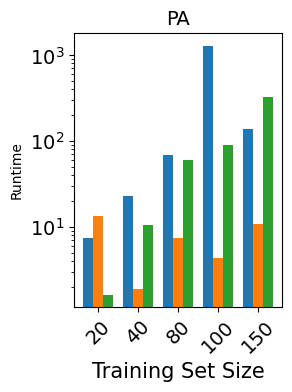

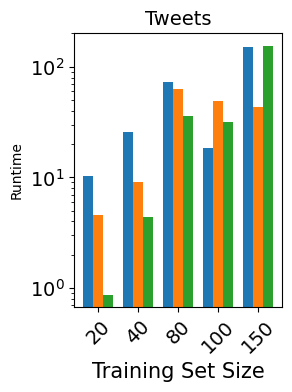

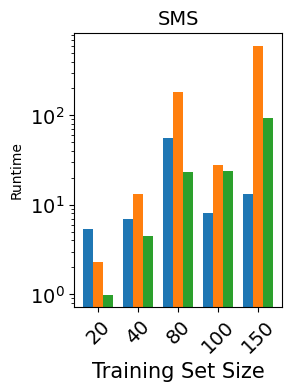

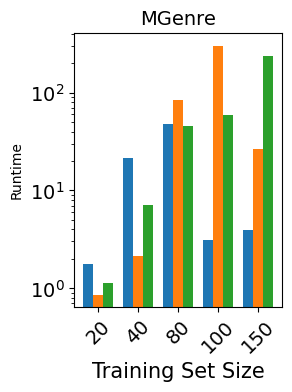

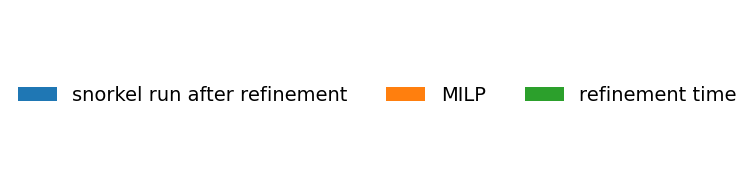

In [241]:
main(df=df, name_mapping=dataset_naming_mappings, plot_dir='./runtime_plots')

In [242]:
# df.to_csv('df_run_time_example.csv', index=False)